# Exploratory Data Analysis

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 300)

### Load data

In [41]:
# Data: order_item_options.csv
df = pd.read_csv(r"..\data\raw_data\order_item_options.csv")
display(df.shape)
display(df.columns)
df.head()

(193017, 6)

Index(['ORDER_ID', 'LINEITEM_ID', 'OPTION_GROUP_NAME', 'OPTION_NAME', 'OPTION_PRICE', 'OPTION_QUANTITY'], dtype='object')

,ORDER_ID,LINEITEM_ID,OPTION_GROUP_NAME,OPTION_NAME,OPTION_PRICE,OPTION_QUANTITY
0,6278eb58dfafab1e053fe172,6278eb63dfafab1e053fe18c,Cheese,American Cheese,0.0,1
1,6278eb58dfafab1e053fe172,6278eb63dfafab1e053fe18c,Veggies,Lettuce,0.5,1
2,6278eb58dfafab1e053fe172,6278eb63dfafab1e053fe18c,Veggies,Tomatoes,0.0,1
3,6278eb58dfafab1e053fe172,6278eb63dfafab1e053fe18c,Veggies,Onion,0.0,1
4,6278eb58dfafab1e053fe172,6278eb63dfafab1e053fe18c,Veggies,Green Peppers,0.0,1


### Statistics

In [42]:
print(f"There are {df['LINEITEM_ID'].nunique()} \t unique LineItem_ID in the dataset")
print(f"There are {df['ORDER_ID'].nunique()} \t Order_ID in the dataset")
print(f"There are {df['OPTION_NAME'].nunique()} \t\t option_names in the dataset")
print(f"There are {df['OPTION_GROUP_NAME'].nunique()} \t\t option_group_names in the dataset")

There are 102712 	 unique LineItem_ID in the dataset
There are 78614 	 Order_ID in the dataset
There are 637 		 option_names in the dataset
There are 133 		 option_group_names in the dataset


### Histogram plot

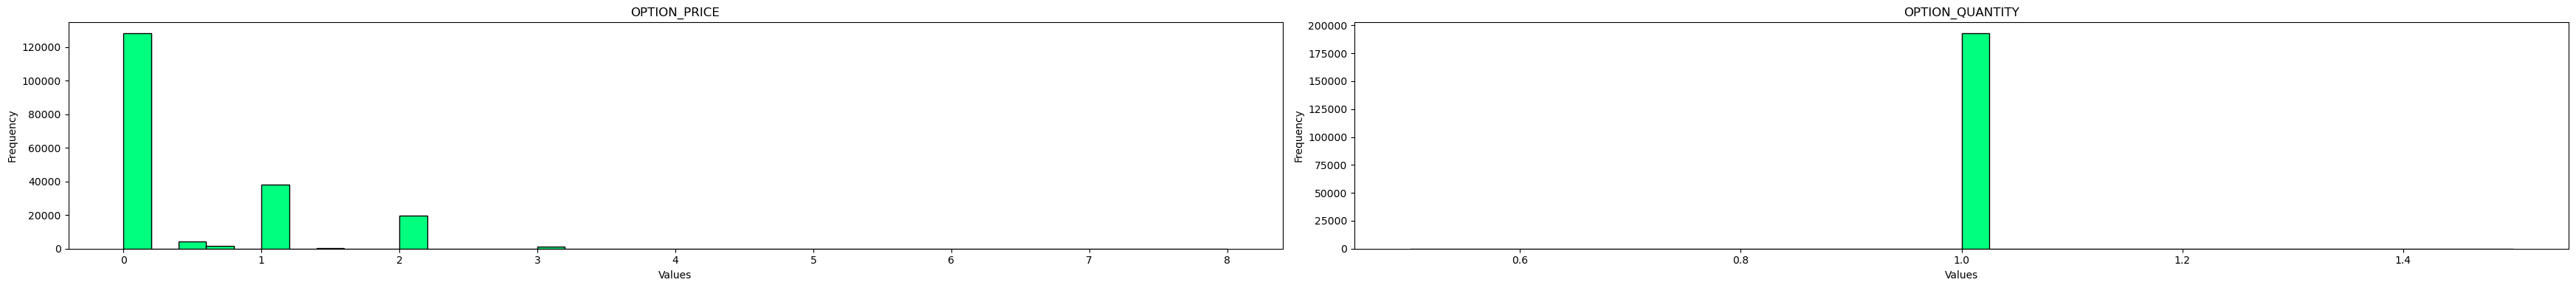

In [43]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(35, n_rows*4))

for ax, col in zip(axes.flatten(), numeric_cols):
    ax.hist(df[col], bins=40, color='springgreen', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

for ax in axes.flatten()[len(numeric_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.savefig('../Reports/project3_columns_order_item_options.png', dpi=300)
plt.show()

### Duplicates

In [44]:
row_dups = df.duplicated().any()
col_dups = df.columns.duplicated().any()

if not row_dups and not col_dups:
    print("No duplicate rows or columns found")
else:
    if row_dups:
        print("Duplicate rows:")
        print(df[df.duplicated()])

    if col_dups:
        print("Duplicate columns:")
        print(df.columns[df.columns.duplicated()])

Duplicate rows:
                        ORDER_ID               LINEITEM_ID OPTION_GROUP_NAME OPTION_NAME  OPTION_PRICE  OPTION_QUANTITY
1970    5f19da32505ee9e8467b2403  5f19da33505ee9e8467b2405        Vegetables    Escarole           0.0                1
2035    5f5bd259535ee95811972b8a  5f5bd26a535ee9de14972b10             Bread          No           0.0                1
2036    5f5bd259535ee95811972b8a  5f5bd26a535ee9de14972b10             Bread          No           0.0                1
2037    5f5bd259535ee95811972b8a  5f5bd26a535ee9de14972b10             Bread          No           0.0                1
2038    5f5bd259535ee95811972b8a  5f5bd26a535ee9de14972b10             Bread          No           0.0                1
...                          ...                       ...               ...         ...           ...              ...
192581  5f71b48b505ee9e10fa8bc2d  5f71b4a0505ee9170ea8bc4b      Milk Options          No           0.0                1
192765  5f71c1e04f5ee93a

In [45]:
print(f"Rows before cleaning: {len(df)}")
df_clean = df.drop_duplicates()
print(f"Rows after cleaning: {len(df_clean)}")
print(f"Number of duplicates removed: {len(df) - len(df_clean)}")

Rows before cleaning: 193017
Rows after cleaning: 190718
Number of duplicates removed: 2299


### Consider Unique key 

In [69]:
print(df_clean[df_clean.duplicated(subset=['LINEITEM_ID', 'OPTION_GROUP_NAME', 'OPTION_NAME'])])

Empty DataFrame
Columns: [ORDER_ID, LINEITEM_ID, OPTION_GROUP_NAME, OPTION_NAME, OPTION_PRICE, OPTION_QUANTITY]
Index: []


In [70]:
unique_key_dups = df_clean[['LINEITEM_ID', 'OPTION_GROUP_NAME', 'OPTION_NAME']].duplicated().any()
unique_key_dups

np.False_

### Missing values

In [47]:
print(f"Is there missing values in the master_dataset?  {df.isna().any().any()}")
display(missing_values_1 := df.isnull().sum())

Is there missing values in the master_dataset?  False


ORDER_ID             0
LINEITEM_ID          0
OPTION_GROUP_NAME    0
OPTION_NAME          0
OPTION_PRICE         0
OPTION_QUANTITY      0
dtype: int64

### Outliers

In [48]:
numeric_cols = df.select_dtypes(include=np.number).columns
text_cols = df.select_dtypes(exclude=np.number).columns

print("Number of numeric columns:", len(numeric_cols))
print("Numeric columns:", numeric_cols.tolist())

print("Number of text columns:", len(text_cols))
print("Text columns:", text_cols.tolist())

Number of numeric columns: 2
Numeric columns: ['OPTION_PRICE', 'OPTION_QUANTITY']
Number of text columns: 4
Text columns: ['ORDER_ID', 'LINEITEM_ID', 'OPTION_GROUP_NAME', 'OPTION_NAME']


In [49]:
display(df[text_cols].nunique())
display(df[text_cols].isna().sum())


ORDER_ID              78614
LINEITEM_ID          102712
OPTION_GROUP_NAME       133
OPTION_NAME             637
dtype: int64

ORDER_ID             0
LINEITEM_ID          0
OPTION_GROUP_NAME    0
OPTION_NAME          0
dtype: int64

In [50]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = (
    (df[numeric_cols] < (Q1 - 1.5 * IQR)) |
    (df[numeric_cols] > (Q3 + 1.5 * IQR))
)

# Number of outliers per column
outliers.sum()

OPTION_PRICE       1398
OPTION_QUANTITY       0
dtype: int64

### Save Clean data

In [51]:
df_clean.to_csv(r"..\data\clean_data\order_item_options.csv", index=False)